In [23]:
# Import Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load the dataset

In [24]:
# 1. Load the dataset
dataset = pd.read_csv('Customer-Churn.csv')

# Data Preprocessing

In [25]:
dataset.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [26]:
dataset.shape

(7043, 21)

# Data Cleaning

In [27]:
# Drop 'customerID' column
dataset.drop('customerID',axis=1, inplace=True)

In [28]:
# handling Empty String
is_empty_or_spaces = dataset.applymap(lambda x: isinstance(x, str) and x.strip() == '')

In [29]:
is_empty_or_spaces.sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [30]:
# Replace empty strings with NaN
dataset.replace(r'^\s*$', np.nan, regex=True, inplace=True)

In [31]:
# Convert 'TotalCharges' to numeric
dataset['TotalCharges'] = pd.to_numeric(dataset['TotalCharges'], errors='coerce')

In [32]:
dataset.dropna(inplace=True)

In [33]:
def unique_col_values(dataset):
    for column in dataset:
        if dataset[column].dtypes=='object':
            print (f'{column}:{dataset[column].unique()}')

unique_col_values(dataset)

gender:['Female' 'Male']
Partner:['Yes' 'No']
Dependents:['No' 'Yes']
PhoneService:['No' 'Yes']
MultipleLines:['No phone service' 'No' 'Yes']
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:['No' 'Yes' 'No internet service']
OnlineBackup:['Yes' 'No' 'No internet service']
DeviceProtection:['No' 'Yes' 'No internet service']
TechSupport:['No' 'Yes' 'No internet service']
StreamingTV:['No' 'Yes' 'No internet service']
StreamingMovies:['No' 'Yes' 'No internet service']
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:['Yes' 'No']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn:['No' 'Yes']


In [34]:
# Replace 'No internet service' and 'No phone service' with 'No'
dataset.replace({'No internet service': 'No', 'No phone service': 'No'}, inplace=True)

In [35]:
# Encode gender as 1/0
dataset['gender'].replace({'Male': 1, 'Female': 0}, inplace = True)

In [36]:
unique_col_values(dataset)

Partner:['Yes' 'No']
Dependents:['No' 'Yes']
PhoneService:['No' 'Yes']
MultipleLines:['No' 'Yes']
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:['No' 'Yes']
OnlineBackup:['Yes' 'No']
DeviceProtection:['No' 'Yes']
TechSupport:['No' 'Yes']
StreamingTV:['No' 'Yes']
StreamingMovies:['No' 'Yes']
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:['Yes' 'No']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn:['No' 'Yes']


In [37]:
catg_cols = ['InternetService', 'Contract', 'PaymentMethod']

# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Fit and transform the data
encoded_data = encoder.fit_transform(dataset[catg_cols])

# Get the feature names after encoding
encoded_feature_names = encoder.get_feature_names_out(catg_cols)

# Create a DataFrame with the encoded data and proper column names
encoded_df = pd.DataFrame(encoded_data, columns=encoded_feature_names)

# Display the first few rows of the encoded DataFrame
encoded_df.head()


,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [38]:
# Reset index of both DataFrames to ensure alignment
dataset.reset_index(drop=True, inplace=True)
encoded_df.reset_index(drop=True, inplace=True)

In [39]:
# Concatenate the original DataFrame (without categorical columns) with the encoded DataFrame
dataset = pd.concat([dataset, encoded_df], axis=1)

dataset.drop(columns=catg_cols, inplace=True)

In [40]:
dataset.replace({'Yes': 1 , 'No': 0}, inplace=True)

In [41]:
# Initialize the scaler
scaler = MinMaxScaler()

# Specify the columns to scale
columns_to_scale = ['tenure', 'MonthlyCharges', 'TotalCharges']  # Replace with your actual columns

# Fit and transform the data
dataset[columns_to_scale] = scaler.fit_transform(dataset[columns_to_scale])

# Correlation Heatmap

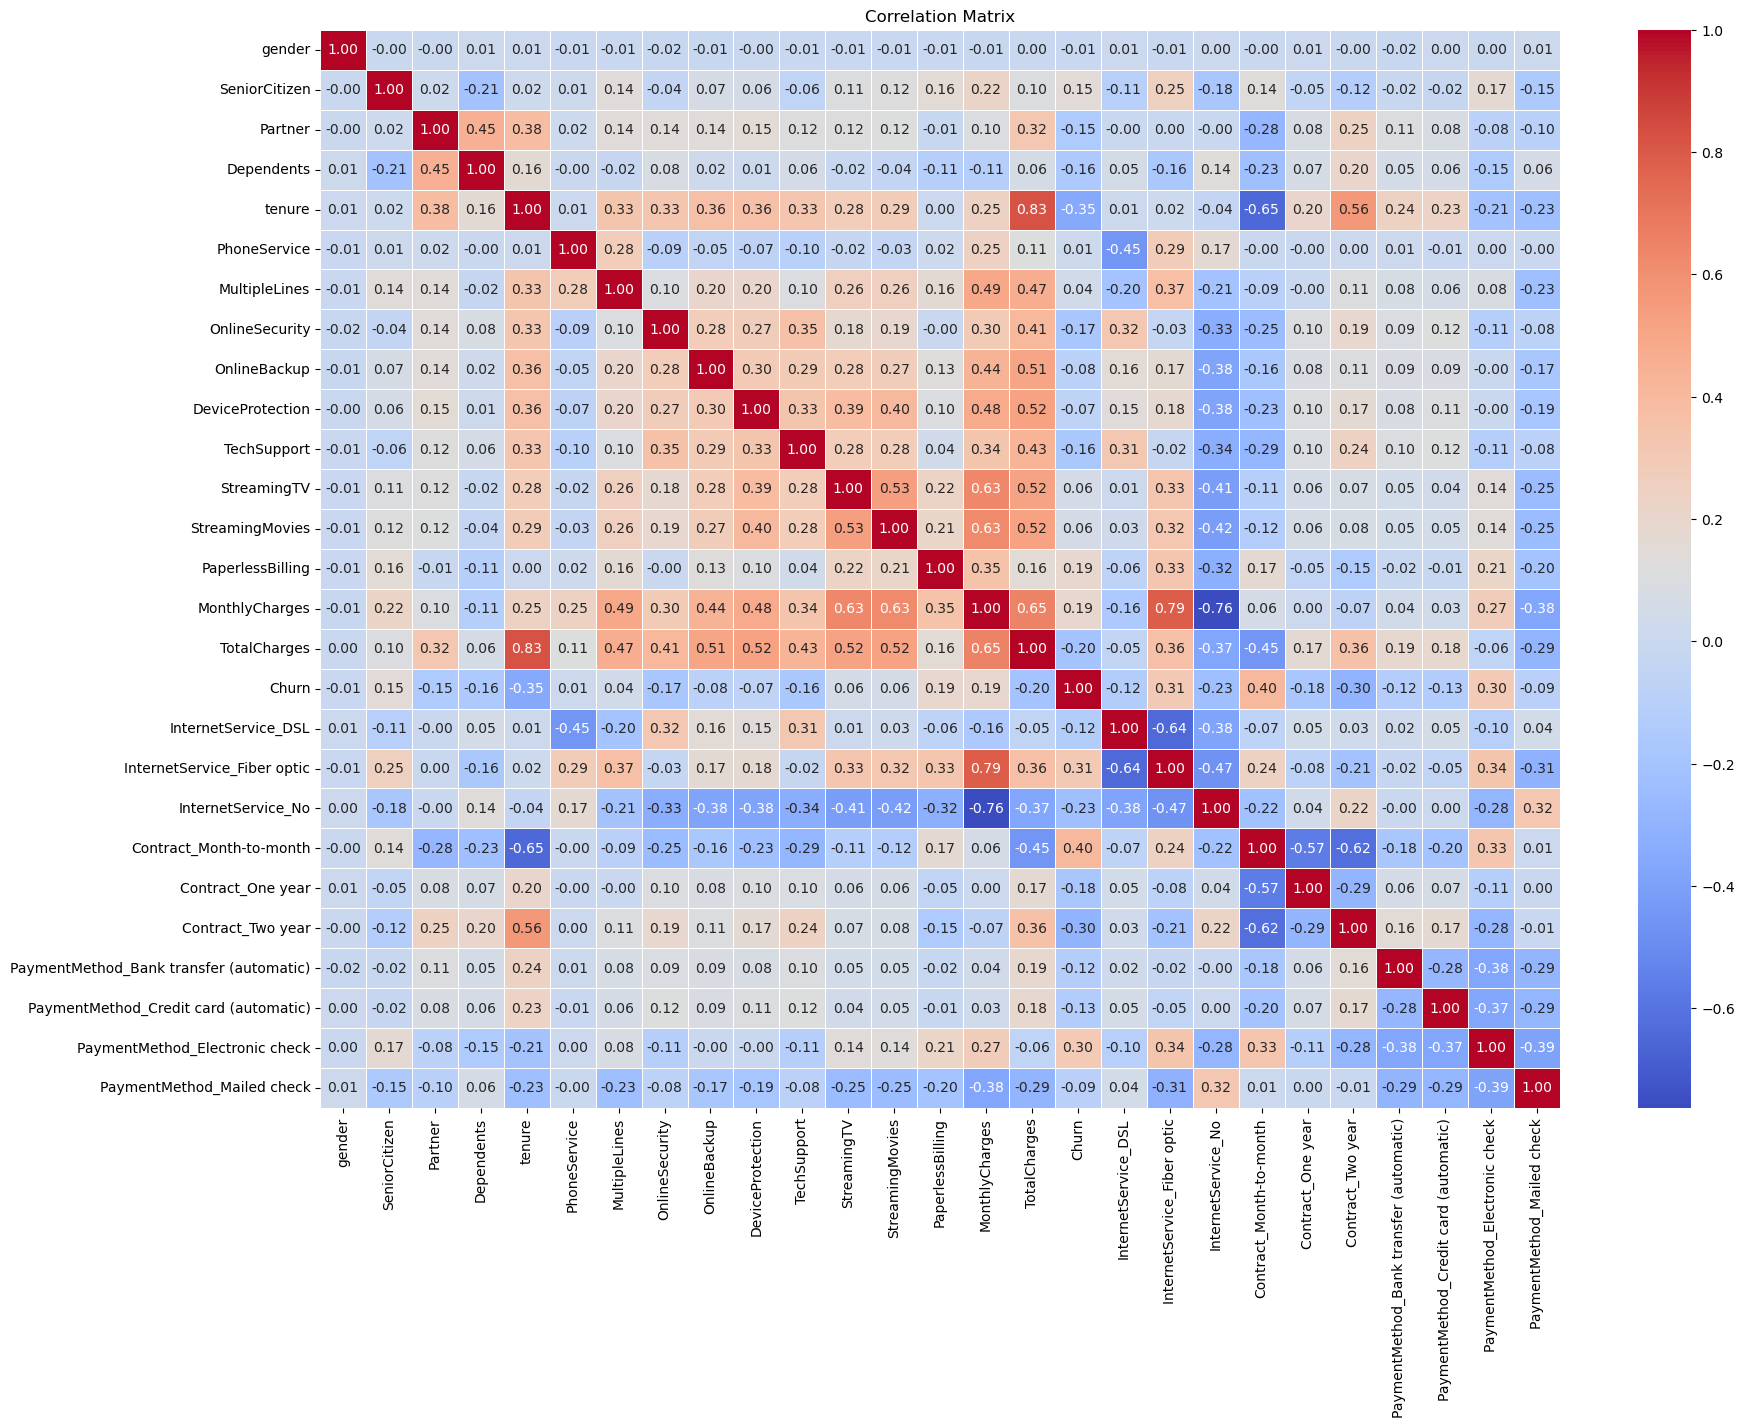

In [42]:
# Create a heatmap
plt.figure(figsize=(20, 14))
sns.heatmap(dataset.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


# Train-test split

In [43]:
X = dataset.drop('Churn', axis=1)  
y = dataset['Churn']  

In [44]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression with GridSearchCV

In [45]:
# Create a logistic regression model
model = LogisticRegression(solver='saga')

In [46]:
parameter = {'penalty': ['l1', 'l2', 'elasticnet'], 'C': [1, 2, 3, 4, 5, 6, 7, 8], 'max_iter': [100, 200, 300, 400]}


In [47]:
Classifier_regressor = GridSearchCV(model, param_grid = parameter, scoring = 'accuracy', cv=5)

Classifier_regressor.fit(X_train, y_train)


C:\Users\dell\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dell\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dell\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dell\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dell\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dell\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was re

GridSearchCV(cv=5, estimator=LogisticRegression(solver='saga'),
             param_grid={'C': [1, 2, 3, 4, 5, 6, 7, 8],
                         'max_iter': [100, 200, 300, 400],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='accuracy')

In [48]:
print(f"Best Parameters: {Classifier_regressor.best_params_}")

Best Parameters: {'C': 8, 'max_iter': 400, 'penalty': 'l1'}


In [49]:
print(f"Best Score: {Classifier_regressor.best_score_}")

Best Score: 0.8071111111111111


In [50]:
y_pred= Classifier_regressor.predict(X_test)

In [51]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.7896233120113717
